In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.facecolor"]

'white'

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

***We will be removig those rows where target column is Nan as it is not good for model to be trained on***


In [6]:
df.dropna(subset = ["RainTomorrow"],inplace = True)

In [7]:
df["RainTomorrow"].isna().sum()

0

***Visualizing the data like how many rows on each year so we can decide how much data should be in train , validation and in test***

***Train Set : 60% Test Set : 30% Validation set : 10%***



<AxesSubplot:title={'center':'No of Rows per Year'}, xlabel='Date', ylabel='count'>

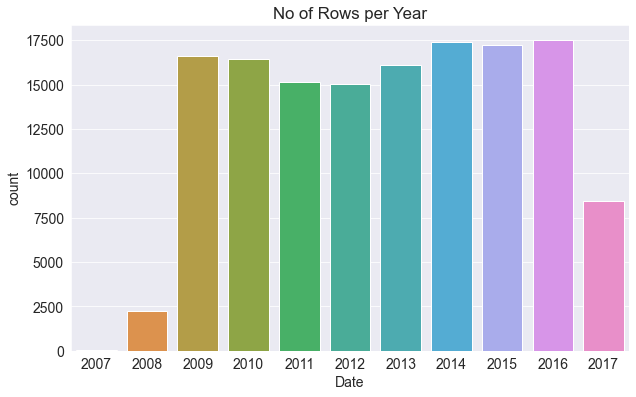

In [13]:
plt.title("No of Rows per Year")
sns.countplot(x = pd.to_datetime(df.Date).dt.year)

***Checking wheter are target column is evenly distributed or not***

In [8]:
pie = df["RainTomorrow"].value_counts()

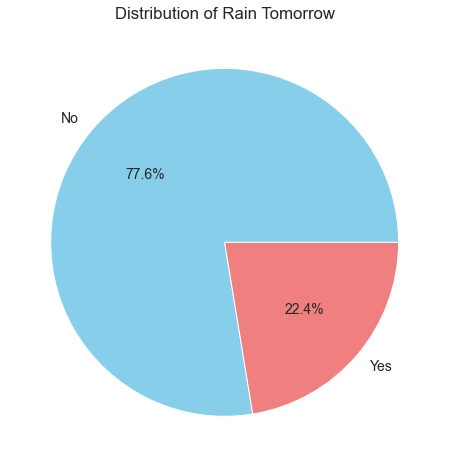

In [9]:
# as we casn see the data is not evenly distributed 
plt.figure(figsize=(8, 8))
plt.pie(pie, labels=pie.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Rain Tomorrow')
plt.show()

# SPLITTING DATA FOR TRAINING 

In [14]:
#we are spliting data based on date as there is a column showing order Which is year column, if data is random we use train test split
year = pd.to_datetime(df.Date).dt.year
train_df = df[year<2015]
val_df = df[year == 2015]
test_df = df[year>2015]

In [17]:
train_df.shape

(98988, 23)

In [18]:
val_df.shape

(17231, 23)

In [19]:
test_df.shape

(25974, 23)

we are reomving date column because we are using this model to be predicted for future dates and removing target column as well as we dont add target column in a ML algo



In [21]:
input_cols = list(train_df.columns)[1:-1]
target_columns = "RainTomorrow"

In [22]:
X_train = train_df[input_cols]
y_train = train_df[target_columns]

In [71]:
val_input = val_df[input_cols].copy()
val_target = val_df[target_columns].copy()

In [73]:
X_test = test_df[input_cols].copy()
y_test = test_df[target_columns].copy()

In [74]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [75]:
num_col = [x for x in X_train.columns if X_train[x].dtype!="object"]

In [76]:
cat_Cols = [x for x in X_train.columns if X_train[x].dtypes == "object"]

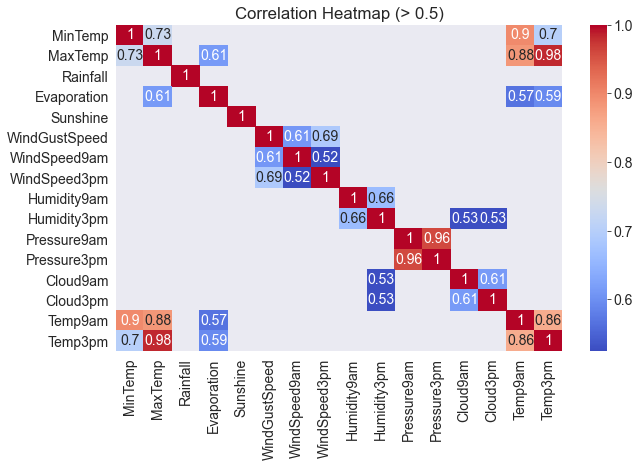

In [77]:
corr_matrix = X_train[num_col].corr()
high_corr_matrix = corr_matrix[corr_matrix>0.5]

sns.heatmap(high_corr_matrix,annot = True,cmap = "coolwarm")
plt.title("Correlation Heatmap (> 0.5)")
plt.show()

***Now we are Imputing missing Values***

In [78]:
X_train[num_col].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [79]:
from sklearn.impute import SimpleImputer

In [69]:
imp = SimpleImputer(strategy="mean").fit(df[num_col])

In [104]:
X_train[num_col] = imp.transform(X_train[num_col])
val_input[num_col] = imp.transform(val_input[num_col])
X_test[num_col] = imp.transform(X_test[num_col])

Scaling Numeric Features Into A one Scale



In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler().fit(df[num_col])

In [107]:
X_train[num_col] = scaler.transform(X_train[num_col])
val_input[num_col] = scaler.transform(val_input[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

***ENCODING CATEGORICAL COLUMNS***

In [108]:
from sklearn.preprocessing import OneHotEncoder

In [109]:
encode = OneHotEncoder()

In [110]:
imp_cat = SimpleImputer(strategy="most_frequent").fit(df[cat_Cols])

In [111]:
X_train[cat_Cols] = imp_cat.transform(X_train[cat_Cols])
val_input[cat_Cols] = imp_cat.transform(val_input[cat_Cols])
X_test[cat_Cols] = imp_cat.transform(X_test[cat_Cols])

In [112]:
encoder = OneHotEncoder(sparse = False,handle_unknown="ignore").fit(df[cat_Cols])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
encoded_cols = encoder.get_feature_names_out(cat_Cols)

In [115]:
X_train[encoded_cols] = encoder.transform(X_train[cat_Cols])
val_input[encoded_cols] = encoder.transform(val_input[cat_Cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_Cols])

<ipython-input-115-d2185266d57c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[encoded_cols] = encoder.transform(X_test[cat_Cols])
<ipython-input-115-d2185266d57c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[encoded_cols] = encoder.transform(X_test[cat_Cols])
<ipython-input-115-d2185266d57c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

Concatinanting Scaled Num Columns and ENCODED categorical Cols 


In [121]:
X_train = pd.concat([X_train[num_col],X_train[encoded_cols]],axis = 1 )

In [124]:
X_val = pd.concat([val_input[num_col],val_input[encoded_cols]],axis = 1 )

In [125]:
X_test = pd.concat([X_test[num_col],X_test[encoded_cols]],axis = 1 )

In [126]:
from sklearn.ensemble import RandomForestClassifier

***The idea behind Randomforest is WISDOM OF CROWD, means by asking people oponion and guess a correct answer 90% +,  Random forest is many decision Trees***

In [127]:
model = RandomForestClassifier(n_jobs = -1,random_state = 42)

***USE OF njobs Parameter***

***Training Speed:***

By default, n_jobs is set to None, which means the random forest will use a single CPU core for training (n_jobs=1). Setting n_jobs to a higher value (e.g., -1 to use all available CPU cores) allows the random forest to use multiple cores for parallel processing during training. This can significantly speed up the training process, especially for large datasets.

***Parallel Execution:***

When n_jobs is set to a positive integer (n_jobs > 1), the random forest algorithm will distribute the work across multiple CPU cores. Each core will process a subset of the trees independently, improving computational efficiency.

***Resource Usage:*** 

Using a higher value for n_jobs can utilize more system resources (CPU cores and memory), so it's important to consider the available resources on your machine and the size of your dataset. For smaller datasets or machines with limited resources, using multiple cores might not always lead to a significant improvement in training speed.

In [129]:
%%time
model.fit(X_train,y_train)

CPU times: user 47.1 s, sys: 883 ms, total: 48 s
Wall time: 19.9 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [130]:
#now checking score of model on train dataset
model.score(X_train,y_train)

0.9999595910615429

In [133]:
#Now checking for validation data , so we get the accuracy of 85% without tuning on our model
model.score(X_val,val_target)

0.8568278103418258

***How ensembling working***

the basic idea of ensembeling is to train multiple model and average there result to maximize the accuracy of a model , means random forest train multiple Decission tree

# Visual Concept Of RandomForest

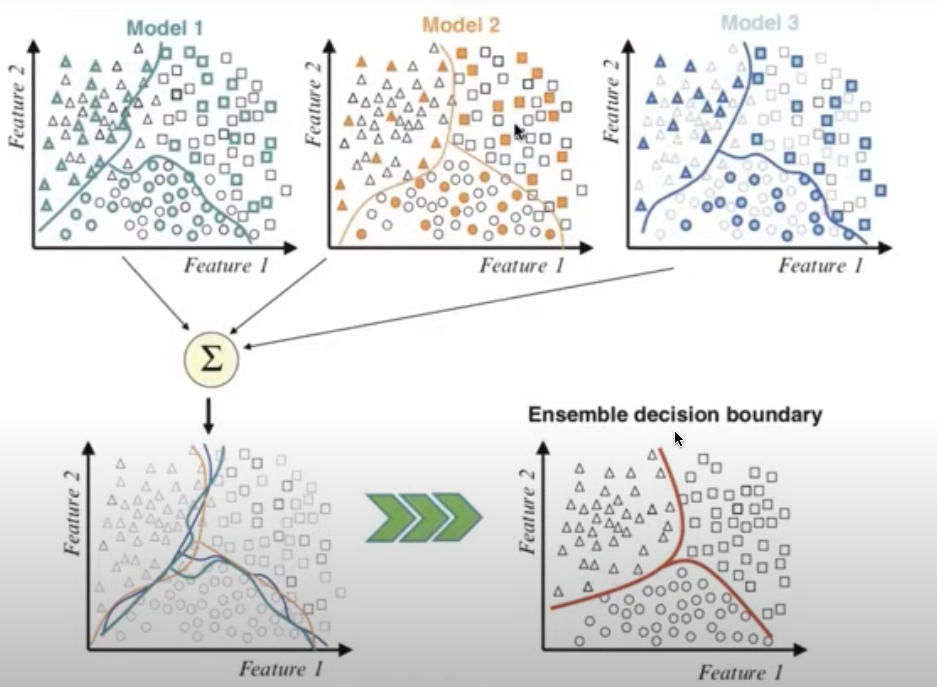

In [134]:
train_probas = model.predict_proba(X_train)

we can see decission tree trainig in random forest  using estimator 

In [137]:
# by defualt there are total 100 decision trees
len(model.estimators_)

100

In [139]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)